# Analyzing 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
sns.set()
%matplotlib inline

In [2]:
boston=load_boston()

In [3]:
X=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.DataFrame(boston.target)
y.columns=['Price']

In [4]:
df=pd.concat([X,y],axis=1)

#### Taking Log tranform of the skewed variables

In [5]:
df[['CRIM']]=pd.DataFrame(np.log(df['CRIM'])) ## because CRIM is right skewed
df[['DIS']]=pd.DataFrame(np.log(df['DIS']))

### Correlation matrix

In [7]:
df.corr(method='pearson',min_periods=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.516929,0.729764,0.029247,0.786196,-0.308210,0.657287,-0.743115,0.850968,0.826073,0.388318,-0.471031,0.623891,-0.452284
ZN,-0.516929,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.590655,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.729764,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.761286,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.029247,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.087037,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.786196,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.831977,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.308210,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.256584,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.657287,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.778243,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.743115,0.590655,-0.761286,-0.087037,-0.831977,0.256584,-0.778243,1.000000,-0.560335,-0.619008,-0.238127,0.324841,-0.563031,0.292316
RAD,0.850968,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.560335,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.826073,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.619008,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Dependant variable vs Independant variable
Here, we will analyze scatter plots of those independant variables, who are either highly or poorly correlated with the target variable Price.This is done in order to eliminate variables which are not correlated with the target variable.

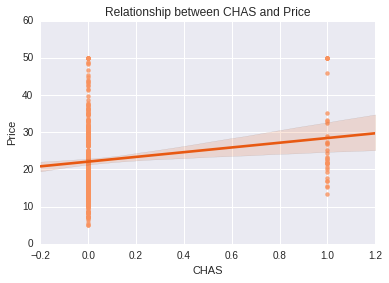

In [6]:
sns.regplot(x='CHAS', y='Price', data=df,fit_reg='True',scatter_kws={'color':'#F9925E'},line_kws={'color':'#E85912'})
plt.title('Relationship between CHAS and Price')

$CHAS$ (whether tracts of the charles river bounds the town or not) has weak correlation with the dependant variable $Price$ .Hence, we may not want to include it in our regression analysis.

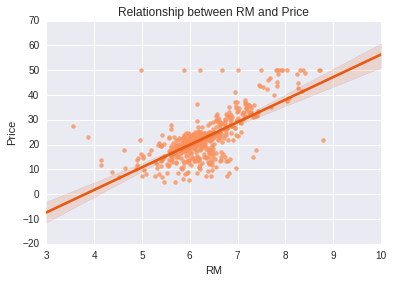

In [8]:
sns.regplot(x='RM', y='Price', data=df,fit_reg='True',scatter_kws={'color':'#F9925E'},line_kws={'color':'#E85912'})
plt.title('Relationship between RM and Price')

The dependant variable $Price$ has partially strong positive correlation with $RM$ (number of rooms in a dwelling).

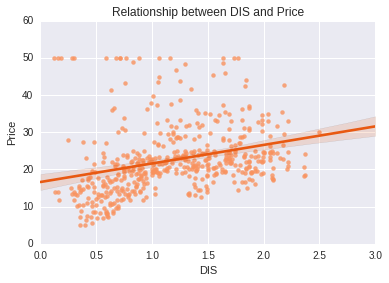

In [9]:
sns.regplot(x='DIS', y='Price', data=df,fit_reg='True',scatter_kws={'color':'#F9925E'},line_kws={'color':'#E85912'})
plt.title('Relationship between DIS and Price')

$DIS$ (weighted distance to Boston’s five employment centers) is weakly correlated with $Price$. Hence, we may not include this feature in our regression analysis.

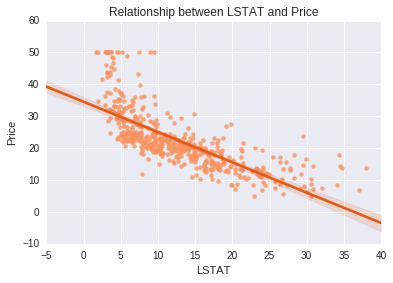

In [10]:
sns.regplot(x='LSTAT', y='Price', data=df,fit_reg='True',scatter_kws={'color':'#F9925E'},line_kws={'color':'#E85912'})
plt.title('Relationship between LSTAT and Price')

$Price$ has high negative correlation with $LSTAT$ (the proportion of people belonging to lower status in a dwelling).This means more the people belonging to lower status, lesser the median value of houses in that region.

## Independant variable vs Independant variable
Here we'll analyze the scatter plots of independent variables to check for collinearity,i.e if two independant variables are highly correlated.

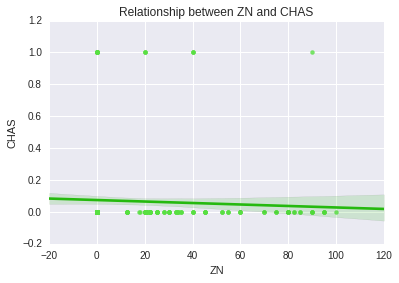

In [11]:
sns.regplot(x='ZN', y='CHAS', data=df,fit_reg='True',scatter_kws={'color':'#58DF42'},line_kws={'color':'#25B90E'})
plt.title('Relationship between ZN and CHAS')

$CHAS$ is weakly correlated to all the independent variables as well. For instance, consider its scatter plot with $ZN$

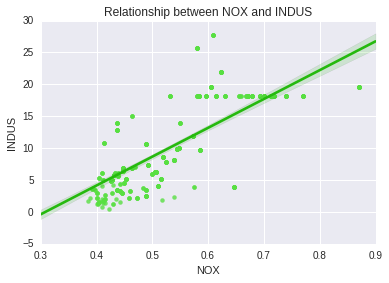

In [12]:
sns.regplot(x='NOX', y='INDUS', data=df,fit_reg='True',scatter_kws={'color':'#58DF42'},line_kws={'color':'#25B90E'})
plt.title('Relationship between NOX and INDUS')

$NOX$ (the concentration of nitrogen-dioxide) is strongly correlated to the $INDUS$ (non-retail businesses).This is intuitive,as more industries generally mean more pollution.

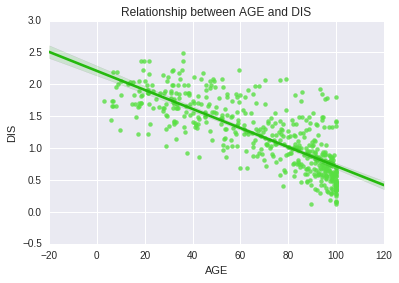

In [13]:
sns.regplot(x='AGE', y='DIS', data=df,fit_reg='True',scatter_kws={'color':'#58DF42'},line_kws={'color':'#25B90E'})
plt.title('Relationship between AGE and DIS')

The owner occupied houses ($AGE$) has high negative correlation with $DIS$(weighted distance to Boston’s five employment centers ).That means towns where employment centers are closer, have more owner occupied houses.

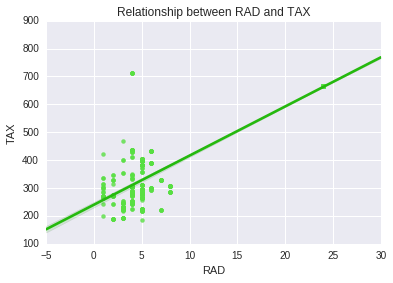

In [14]:
sns.regplot(x='RAD', y='TAX', data=df,fit_reg='True',scatter_kws={'color':'#58DF42'},line_kws={'color':'#25B90E'})
plt.title('Relationship between RAD and TAX')

$RAD$ and $TAX$ are highly correlated features.This means that they are collinear and hence, we’ll have to remove one of them while carrying out regression analysis.

### Conclusion
Therefore, we will not be considering $CHAS$ (whether the tracts of charles river bounds the town or not) and $DIS$ (weighted distance to five boston employment centers), because they are weakly correlated with the dependant variable.
Also, we will discard $RAD$, because $TAX$ and $RAD$ are collinear and because $TAX$ is more correlated to $Price$ than $RAD$, we will discard $RAD$. 
